In [1]:
%matplotlib inline
from modsim import *

In [2]:
from pandas import read_html

Import US History.com Data

In [3]:
filename = 'http://www.u-s-history.com/pages/h980.html' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0,
                    decimal = 'M')

In [4]:
table1a = tables[2]

In [5]:
table1a.columns = [ 'pop1ushis', 'increase', 'incp', 'urban', 'rural',]

table1a.head()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1790,3929214,-,-,5.1,94.9
1800,5308483,1379269,35.1,6.1,93.9
1810,7239881,1931398,36.4,15.4,92.7
1820,9638453,2398572,33.1,7.2,92.8
1830,12860702,3222249,33.4,8.8,91.2


In [6]:
table1a.tail()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1960,189323175,27997377,18.5,69.9,30.1
1970,213302031,23978856,13.4,73.6,26.3
1980,236542199,23240168,11.4,73.7,26.3
1990,258709873,22167674,9.8,75.2,24.8
2000,291421906,32712033,13.2,81.0,19.0


In [7]:
pop1ushis = table1a.pop1ushis / 1e6

In [8]:
pop1ushis.values

array([   3.929214,    5.308483,    7.239881,    9.638453,   12.860702,
         17.063353,   23.191876,   31.443321,   38.558371,   50.189209,
         62.979766,   76.212168,   92.228496,  106.021537,  123.202624,
        142.164569,  161.325798,  189.323175,  213.302031,  236.542199,
        258.709873,  291.421906])

In [9]:
pop1ushis.index

Int64Index([1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890,
            1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000],
           dtype='int64', name='Census Year')

In [10]:
first_year1 = pop1ushis.index[0]
last_year1 = pop1ushis.index[-1]

Saving figure to file chap03-fig01.pdf


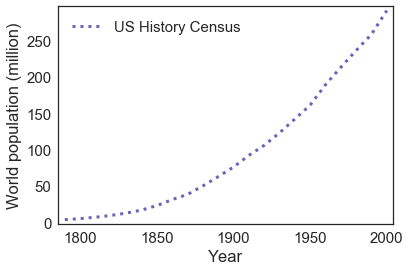

In [11]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    pop1ushis = table1a.pop1ushis / 1e6
   
    plot(pop1ushis, ':', color='darkblue', label='US History Census')
    
    decorate(xlabel='Year',
             ylabel='World population (million)')
    
newfig()
plot_estimates(table1a)
savefig('chap03-fig01.pdf')

Insert Wikipedia.org Data

In [12]:
filename = 'https://en.wikipedia.org/wiki/Demographic_history_of_the_United_States' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0, 
                    decimal = 'M')

In [13]:
table1b = tables[3]

In [14]:
table1b.columns = ['pop2wiki']
table1b

,pop2wiki
Census year,
NaN,NaN
1610.0,350.0
1620.0,2302.0
1630.0,4646.0
1640.0,26634.0
1650.0,50368.0
1660.0,75058.0
1670.0,111935.0
1680.0,151507.0


In [15]:
pop2wiki = table1b.pop2wiki / 1e6

In [16]:
first_year2 = pop2wiki.index[1]
last_year2 = pop2wiki.index[-1]

In [17]:
def plot_estimates():
    pop1ushis = table1a.pop1ushis / 1e6
    pop2wiki = table1b.pop2wiki / 1e6
    
    plot(pop1ushis, ':', color='darkblue', label = 'US History')
    plot(pop2wiki, '--', color='green', label = 'Wikipedia')
    
    decorate(xlabel='Year',
             ylabel='US population (billion)')

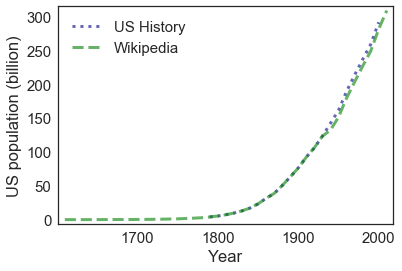

In [18]:
plot_estimates()

PROPORTIONAL GROWTH MODEL

US History.com Data

In [22]:
results1 = TimeSeries()

def run_simulation_our_estimation1(system1):
    results1 = TimeSeries()
    results1[system1.t01] = system1.p01
    for t in linrange(system1.t01, system1.t_end1):
        births1 = system1.birth_rate1 * results1[t]
        deaths1 = system1.death_rate1 * results1[t]
        results1[t+1] = results1[t] + births1 - deaths1
    system1.results1 = results1

In [23]:
t01 = pop1ushis.index[0]
t_end1 = pop1ushis.index[-1]
p01=pop1ushis[first_year1]

In [24]:
system1 = System(t01 = t01,
                t_end1 = t_end1,
                p01 = p01,
                pop1ushis = pop1ushis)

In [25]:
system1.death_rate1 = 0.01
system1.birth_rate1 = 0.027

In [26]:
run_simulation_our_estimation1(system1)
results1

,value


In [41]:
def update_func1(ushis, t, system1):
    births1 = system1.birth_rate1 * ushis
    deaths1 = system1.death_rate1 * ushis
    return ushis + births1 - deaths1


In [42]:
def run_simulation1(system1, update_func1):
    results1 = TimeSeries()
    results1[system1.t01] = system1.p01
    for t in linrange(system1.t01, system1.t_end1):
        results1[t+1] = update_func1(results1[t], t, system1)
    system1.results1 = results1

In [43]:
run_simulation1(system1,update_func1)

In [44]:
system1.alpha1 = system1.birth_rate1 - system1.death_rate1

In [45]:
def update_func1b(ushis, t, system1):
    net_growth1 = system1.alpha1 * ushis
    return ushis + net_growth1

In [46]:
run_simulation1(system1, update_func1b)

Wikipedia.org Data

In [19]:
def run_simulation_our_estimation(system):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
    system.results = results

In [20]:
system = System(t01 = t01,
                t_end1 = t_end1,
                p01 = p01,
                pop1ushis = pop1ushis)

NameError: name 't01' is not defined

In [168]:
system.death_rate = 0.01
system.birth_rate = 0.027

In [169]:
def update_func1(pop, t, system):
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths


In [170]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results

In [171]:
run_simulation(system,update_func1)

AttributeError: 'System' object has no attribute 'p0'

In [25]:
system.alpha = system.birth_rate - system.death_rate

In [26]:
def update_func1b(pop, t, system):
    net_growth = system.alpha * pop
    return pop + net_growth

In [27]:
run_simulation(system, update_func1b)

END OF PROPORTIONAL GROWTH MODEL